# FLIGHT PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import pandas_profiling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv("Flight_Price_Data.csv")
df

Unnamed: 0    Airline Departure_time Time_of_arrival Duration  \
0              0   Air Asia          08:20           14:10   5h 50m   
1              1   Air Asia          20:45           07:15  10h 30m   
2              2   Air Asia          09:35           20:35  11h 00m   
3              3   Air Asia          08:00           20:35  12h 35m   
4              4   SpiceJet          18:55           21:05   2h 10m   
...          ...        ...            ...             ...      ...   
5750        5750  Air India          14:45           13:15  22h 30m   
5751        5751  Air India          14:45           13:15  22h 30m   
5752        5752  Air India          14:45           13:15  22h 30m   
5753        5753  Air India          14:45           13:15  22h 30m   
5754        5754  Air India          14:45           13:15  22h 30m   

         Source Destination      Meal_availability Number_of_stops   Price  
0     New Delhi      Mumbai              eCash 250          1 Stop   5,949  
1     New Delhi      Mumbai  Emissions: 303 Kg CO2          1 Stop   5,949  
2     New Delhi      Mumbai  Emissions: 303 Kg CO2          1 Stop   5,949  
3     New Delhi      Mumbai  Emissions: 303 Kg CO2          1 Stop   5,949  
4     New Delhi      Mumbai              eCash 250        Non Stop   5,953  
...         ...         ...                    ...             ...     ...  
5750    Lucknow      Jaipur              Free Meal       2 Stop(s)  23,112  
5751    Lucknow      Jaipur              Free Meal       2 Stop(s)  23,112  
5752    Lucknow      Jaipur              Free Meal       2 Stop(s)  23,112  
5753    Lucknow      Jaipur              Free Meal       2 Stop(s)  23,112  
5754    Lucknow      Jaipur              Free Meal       3 Stop(s)  23,112  

[5755 rows x 10 columns]

#### Information
Airline: Name of the airline.

Departure_time: Time of departure of flight from the source location.

Time_of_arrival: Time of arrival at destination.

Duration: Total time of the journey from source to destination.

Source: City names from where the flight is departing.

Destination: Name of the city to which flight is arriving.

Meal_availability : information about meal fare.

Number_of_stops: Number of stops during the journey.

Price : Flight fare.


### EDA- Exploratory Data Analysis

In [3]:
#lets check the shape
df.shape

(5755, 10)

In [4]:
#checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5755 non-null   int64 
 1   Airline            5755 non-null   object
 2   Departure_time     5755 non-null   object
 3   Time_of_arrival    5755 non-null   object
 4   Duration           5755 non-null   object
 5   Source             5755 non-null   object
 6   Destination        5755 non-null   object
 7   Meal_availability  5755 non-null   object
 8   Number_of_stops    5755 non-null   object
 9   Price              5755 non-null   object
dtypes: int64(1), object(9)
memory usage: 449.7+ KB


We can see the dataset is having 5755 rows and 9 columns. And there are no missing values in our data set. All columns are with the data type as object, we will convert the numerical data to float data type.

In [63]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Meal_availability              3
Number_of_stops                5
Airline                        6
Source                         9
Destination                    9
Departure_time               245
Time_of_arrival              246
Duration                     400
Price                       2126

In [5]:
#droping unwanted column
df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
#lets check total stops
df["Meal_availability"].value_counts()

eCash 250                2475
Free Meal                1990
No Meal Fare             1219
Emissions: 142 Kg CO2      17
Emissions: 109 Kg CO2      14
Emissions: 303 Kg CO2      10
Emissions: 191 Kg CO2       6
Emissions: 185 Kg CO2       6
Emissions: 331 Kg CO2       6
Emissions: 140 Kg CO2       6
Emissions: 112 Kg CO2       4
Emissions: 252 Kg CO2       2
Name: Meal_availability, dtype: int64

In [7]:
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')

In [8]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 142 Kg CO2','None')

In [9]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 109 Kg CO2','None')

In [10]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 303 Kg CO2','None')

In [11]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 331 Kg CO2','None')

In [12]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 185 Kg CO2','None')

In [13]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 191 Kg CO2','None')

In [14]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 140 Kg CO2','None')

In [15]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 112 Kg CO2','None')

In [16]:
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 252 Kg CO2','None')

In [17]:
df

Airline Departure_time Time_of_arrival Duration     Source  \
0      Air Asia          08:20           14:10   5h 50m  New Delhi   
1      Air Asia          20:45           07:15  10h 30m  New Delhi   
2      Air Asia          09:35           20:35  11h 00m  New Delhi   
3      Air Asia          08:00           20:35  12h 35m  New Delhi   
4      SpiceJet          18:55           21:05   2h 10m  New Delhi   
...         ...            ...             ...      ...        ...   
5750  Air India          14:45           13:15  22h 30m    Lucknow   
5751  Air India          14:45           13:15  22h 30m    Lucknow   
5752  Air India          14:45           13:15  22h 30m    Lucknow   
5753  Air India          14:45           13:15  22h 30m    Lucknow   
5754  Air India          14:45           13:15  22h 30m    Lucknow   

     Destination Meal_availability Number_of_stops   Price  
0         Mumbai              None          1 Stop   5,949  
1         Mumbai              None          1 Stop   5,949  
2         Mumbai              None          1 Stop   5,949  
3         Mumbai              None          1 Stop   5,949  
4         Mumbai              None        Non Stop   5,953  
...          ...               ...             ...     ...  
5750      Jaipur         Free Meal       2 Stop(s)  23,112  
5751      Jaipur         Free Meal       2 Stop(s)  23,112  
5752      Jaipur         Free Meal       2 Stop(s)  23,112  
5753      Jaipur         Free Meal       2 Stop(s)  23,112  
5754      Jaipur         Free Meal       3 Stop(s)  23,112  

[5755 rows x 9 columns]

In [18]:
df.Number_of_stops.replace({"Non Stop": 0,
            "1 Stop": 1,
            "2 Stop(s)": 2,
            "3 Stop(s)": 3,
            "4 Stop(s)": 4},
           inplace = True)

In [19]:
#Extracting numerical data using Duration 
df["hour"] = df.Duration.str.split('h').str.get(0)
df["min"] = df.Duration.str.split('h').str.get(1)
df["min"]=df["min"].str.split('m').str.get(0)
df["hour"]=df['hour'].astype('float')
df["min"]=df['min'].astype('float')

df["Duration"] = df["hour"] + df["min"]/60

In [20]:
df.head()

Airline Departure_time Time_of_arrival   Duration     Source Destination  \
0  Air Asia          08:20           14:10   5.833333  New Delhi      Mumbai   
1  Air Asia          20:45           07:15  10.500000  New Delhi      Mumbai   
2  Air Asia          09:35           20:35  11.000000  New Delhi      Mumbai   
3  Air Asia          08:00           20:35  12.583333  New Delhi      Mumbai   
4  SpiceJet          18:55           21:05   2.166667  New Delhi      Mumbai   

  Meal_availability  Number_of_stops  Price  hour   min  
0              None                1  5,949   5.0  50.0  
1              None                1  5,949  10.0  30.0  
2              None                1  5,949  11.0   0.0  
3              None                1  5,949  12.0  35.0  
4              None                0  5,953   2.0  10.0

Using hour and min column I have created Duration column with float values, now I am dropping hour and min columns

In [21]:
df.drop(columns = ["hour","min"], inplace = True)

In [22]:
#Lets convert data type of Price column to float
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

In [23]:
#Similar to Duration I will extract numric data from Departure_time and Time_of_arrival columns using below codes.

df["Dep_hour"] = pd.to_datetime(df.Departure_time, format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df.Departure_time, format="%H:%M").dt.minute
df["Departure_time"]= df['Dep_hour']+df['Dep_min']/60
df.drop(columns = ['Dep_hour','Dep_min'],inplace=True)

df["Arvl_hour"] = pd.to_datetime(df.Time_of_arrival, format="%H:%M").dt.hour
df["arvl_min"] = pd.to_datetime(df.Time_of_arrival, format="%H:%M").dt.minute
df["Time_of_arrival"]= df['Arvl_hour']+df['arvl_min']/60
df.drop(columns = ['Arvl_hour','arvl_min'],inplace=True)    

In [24]:
#lets check the data type again
df.dtypes

Airline               object
Departure_time       float64
Time_of_arrival      float64
Duration             float64
Source                object
Destination           object
Meal_availability     object
Number_of_stops        int64
Price                float64
dtype: object

### visualisation

In [25]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

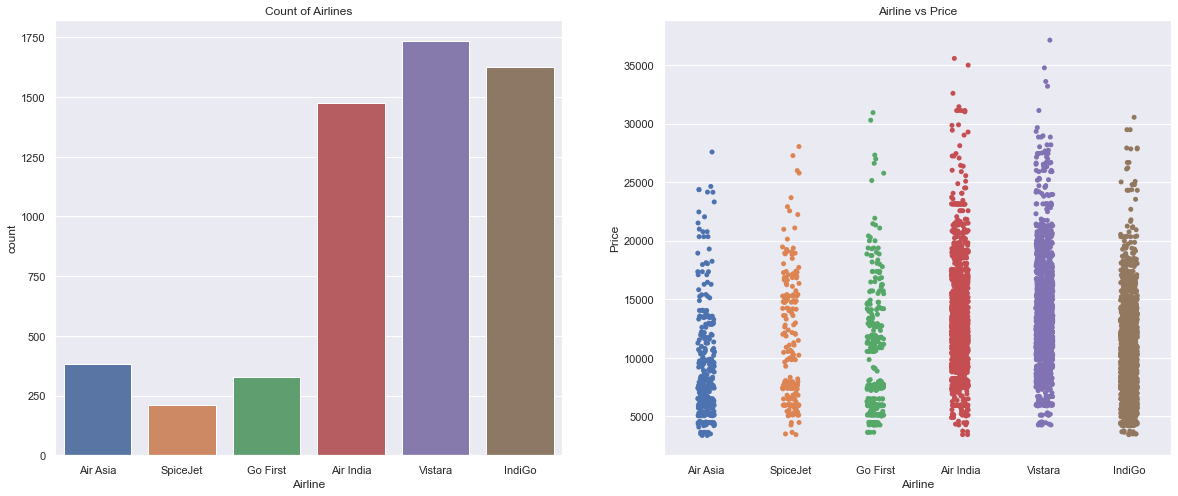

In [26]:
#lets check the count of airlines and check the relation between airline and Price
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Airline)
plt.title('Count of Airlines')

plt.subplot(1,2,2)
sns.stripplot(x='Airline',y='Price', data=df)
plt.title('Airline vs Price')

plt.show()

The count plot will tell us that there are more number of flights of Vistara, IndiGo and Air India than others. flights of Spice Jet are very less in numbers.

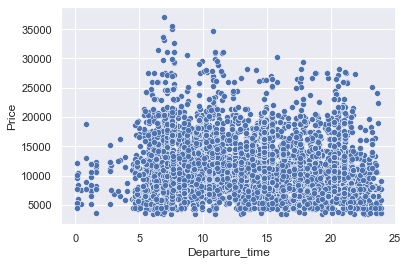

In [27]:
#check the relation between Departure_time and Price
sns.scatterplot(x='Departure_time',y='Price',data=df)
plt.show()

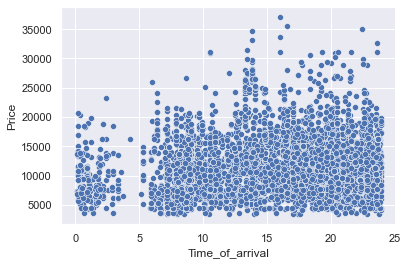

In [28]:
#check the relation between Time_of_arrival and Price
sns.scatterplot(x='Time_of_arrival',y='Price',data=df)
plt.show()

The above scatter plot is showing relation between Time of arrival and flight prices, which will tell us that very few number of flights are arriving in the early morning that is arrount 0 to 5 am. We can say the flight prices are not much dependent on the time of arrival.

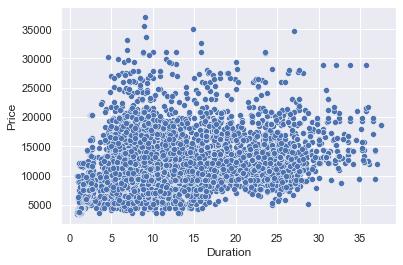

In [29]:
#check the relation between Duration and Price
sns.scatterplot(x='Duration',y='Price',data=df)
plt.show()


The above figure is representing the scatter plot of Duration vs Price. Looking at this figure we can say that there is some linear relation between price and duration. The price increaes with duration.

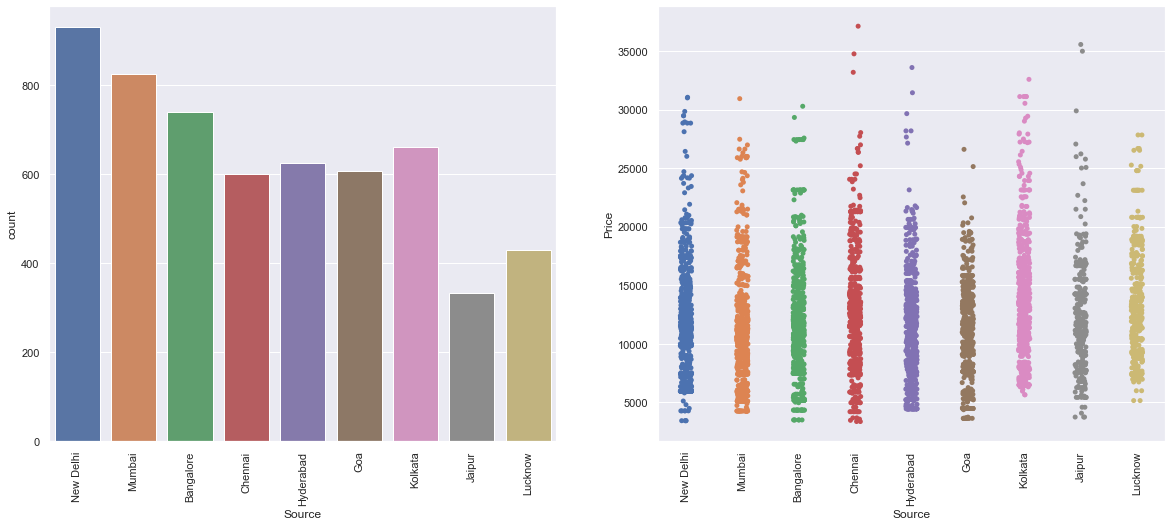

In [30]:
#Lets check the count and relation of Source with target variable
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Source)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Source',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

Here we are having more number of flights from New Delhi, Mumbai, Bangalore and Kolkata than other cities. Looking at the strip plot we can say flights from New Delhi are having some what higher prices than other cities.

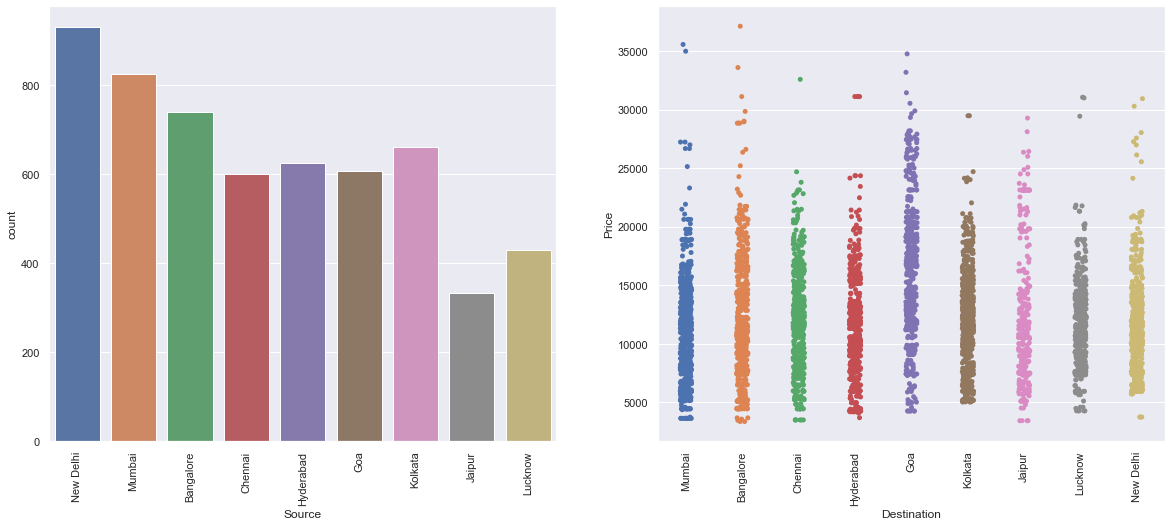

In [31]:
#Lets check the count and relation of Destination with target variable
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Source)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Destination',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

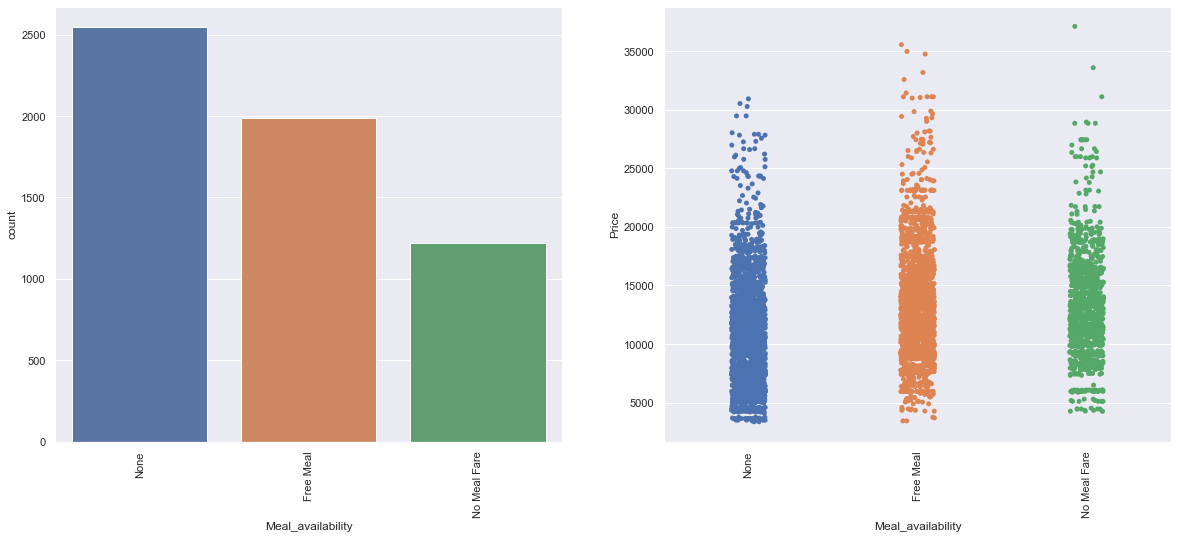

In [32]:
#lets check the relation between Meal_availability and prices
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Meal_availability)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Meal_availability',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

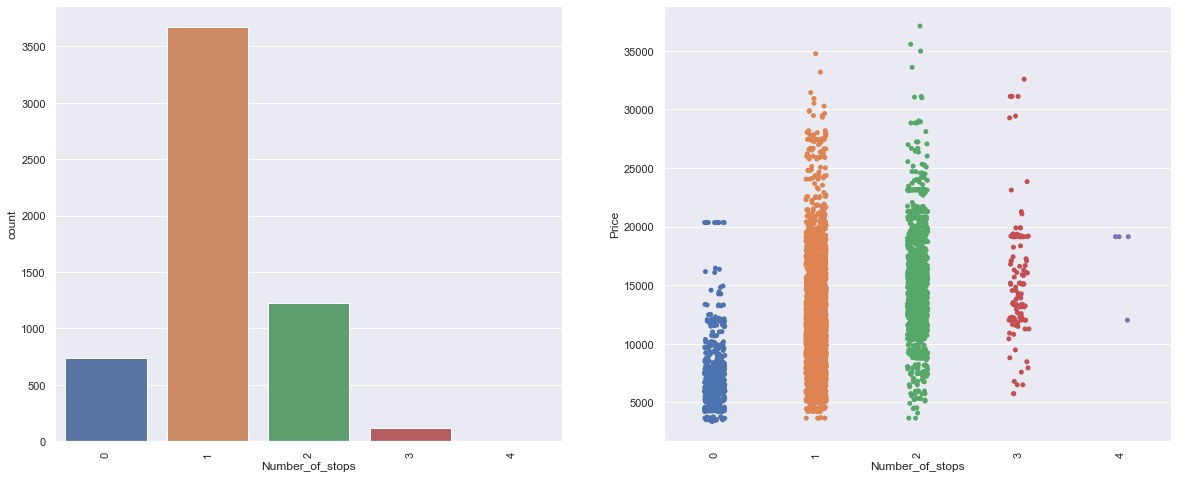

In [33]:
#lets check the count of stops and relation with price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Number_of_stops)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Number_of_stops',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()


The above count plot will tell us that most of the flights are with 1 stop and very few are with 3 and 4 stops during the Journy. We can see that the prices are increasing with the number of stops.

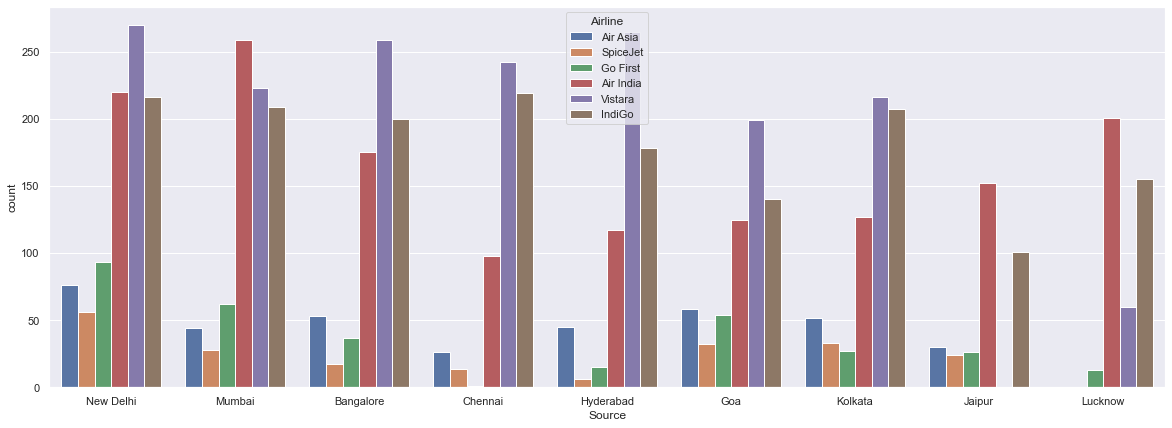

In [34]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df)
plt.show()

The above plot is showing the region wise count of airlines which will tell us that Jaipur is not having any flight of Vistara and the city Lucknow is not having any flights of Air asia and Spice Jet. And all cities are having flights of IndiGo and Air India with higher count.

<Figure size 1440x576 with 0 Axes>

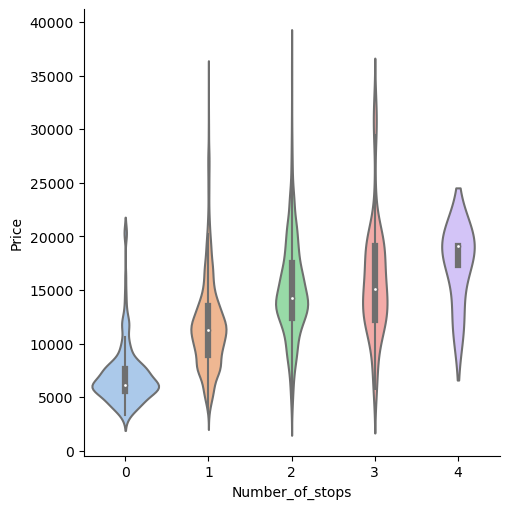

In [35]:
#lets check the relation between fuel_type, Gear_transmission and Mileage 
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.catplot(x="Number_of_stops", y="Price",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

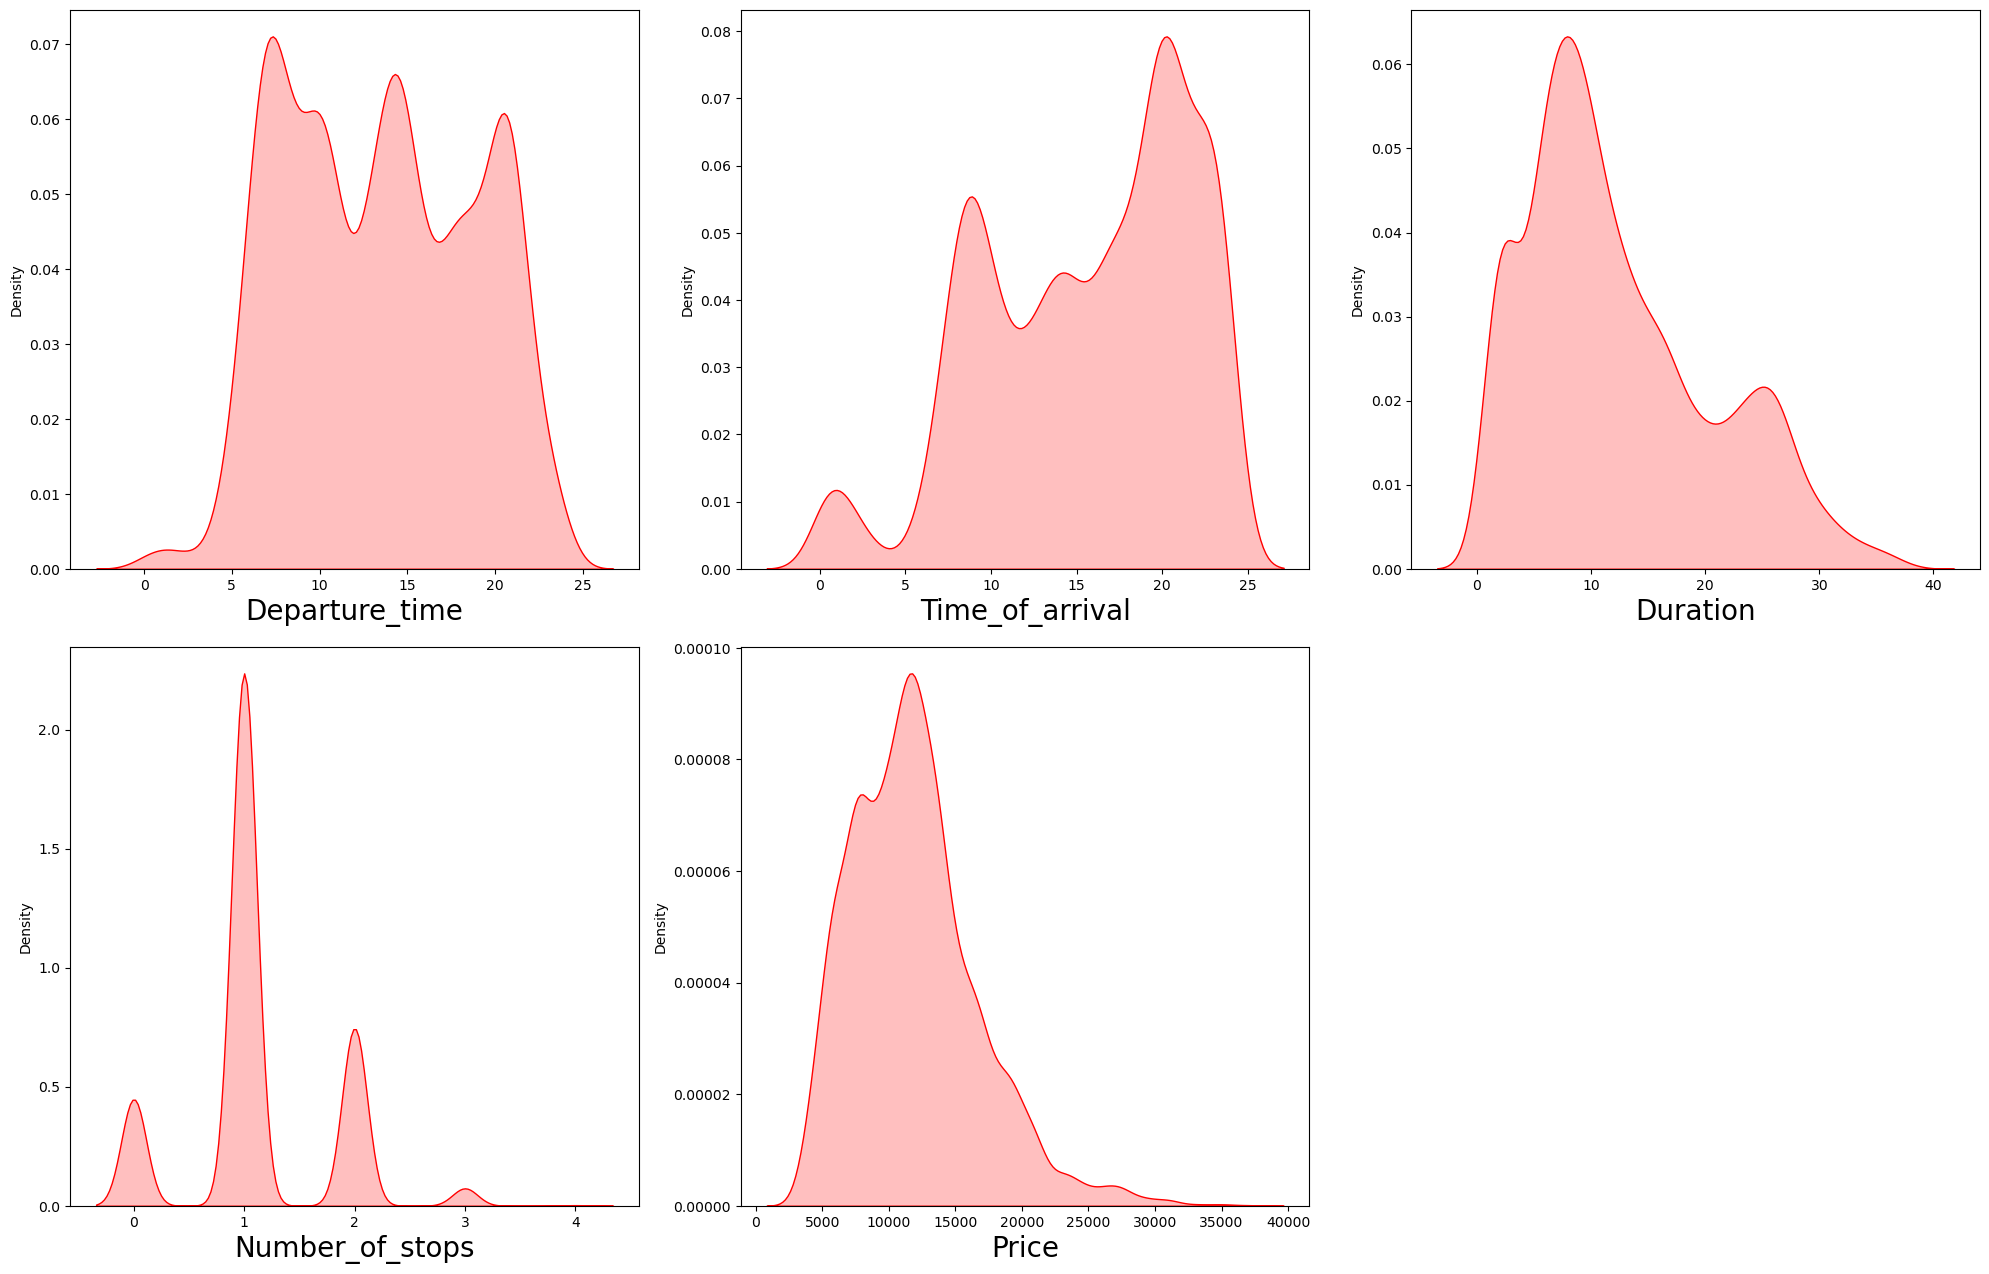

In [36]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Looking at the distribution of these features we can say the Duration column is having some outliers so I will remove outliers only from this column



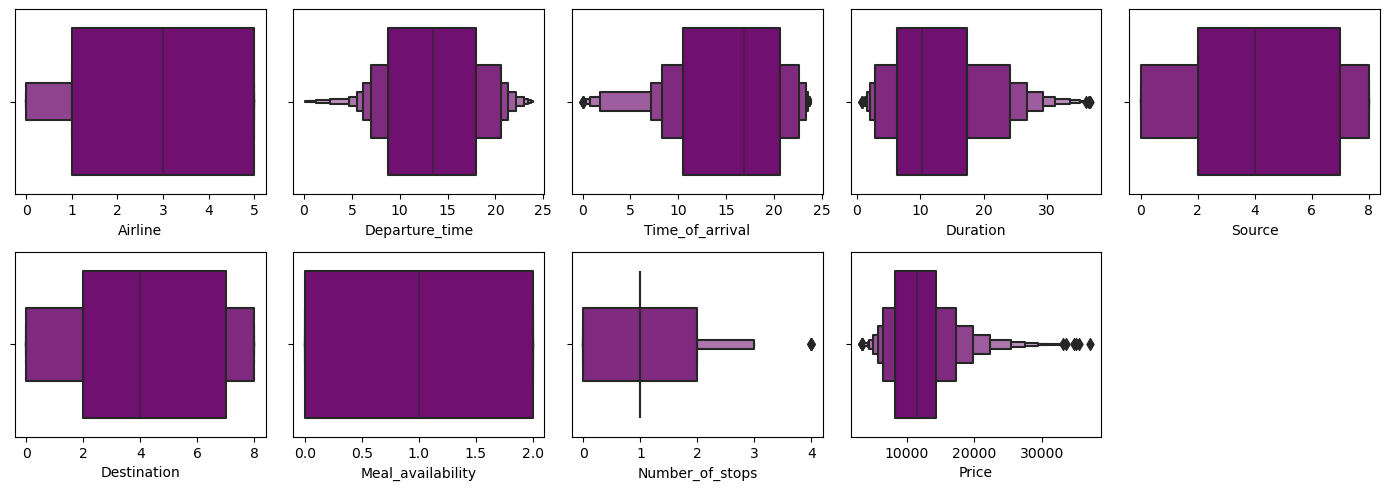

In [65]:
#outliers
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(3, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='purple')
    plt.tight_layout()

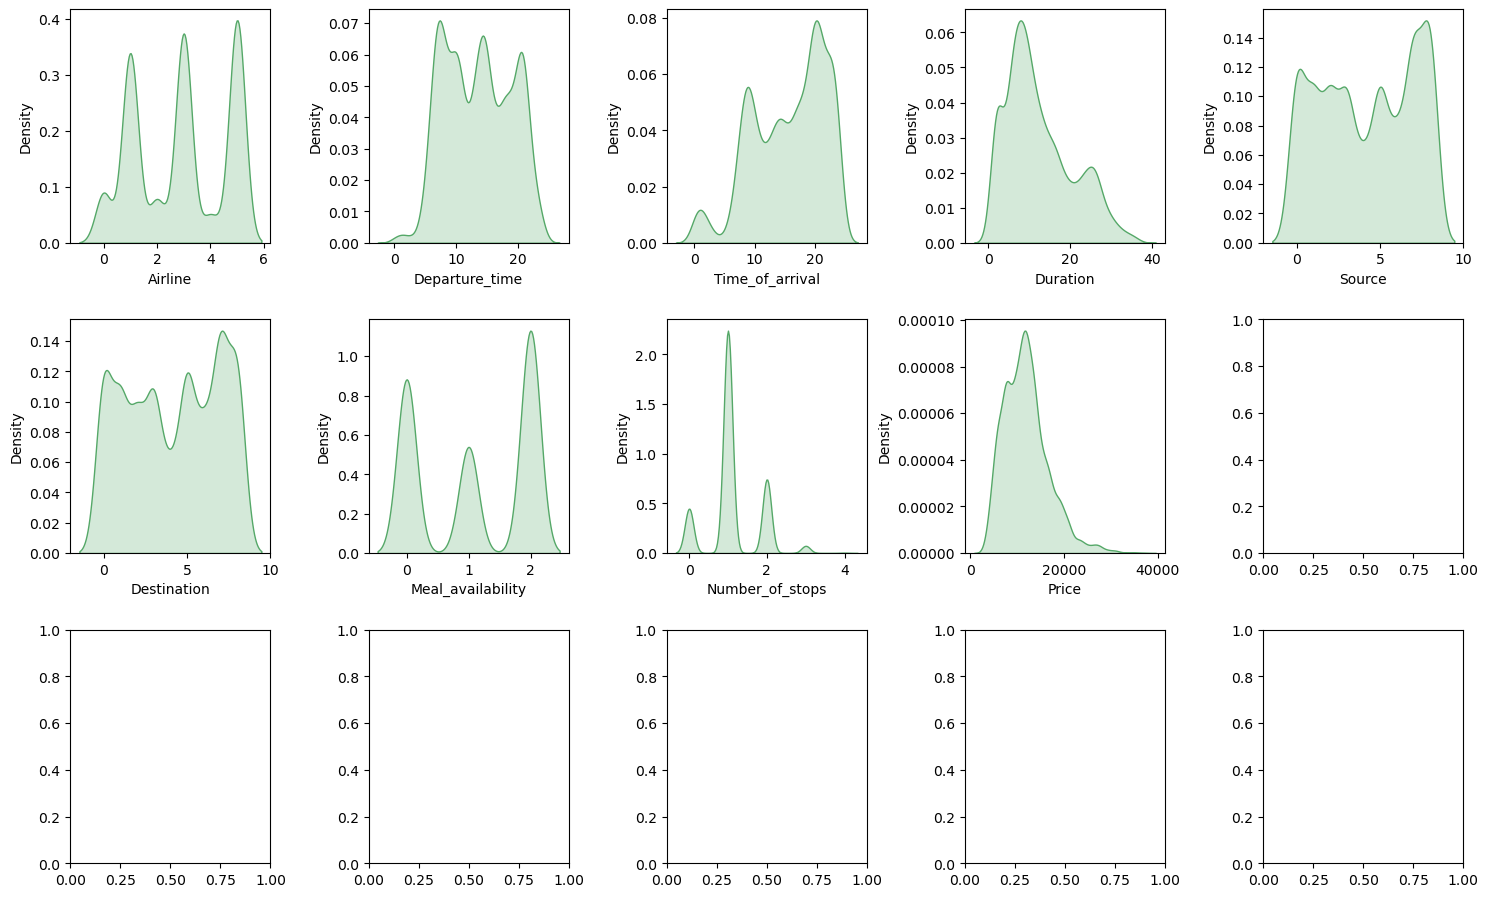

In [64]:
#skewness
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,9))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.0)
plt.show()

In [37]:
#apply zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Duration']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(5749, 9)

Here by removing outliers from our data we are not loosing much data.

#### Encoding

In [38]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df

Airline  Departure_time  Time_of_arrival   Duration  Source  \
0         0.0        8.333333        14.166667   5.833333     8.0   
1         0.0       20.750000         7.250000  10.500000     8.0   
2         0.0        9.583333        20.583333  11.000000     8.0   
3         0.0        8.000000        20.583333  12.583333     8.0   
4         4.0       18.916667        21.083333   2.166667     8.0   
...       ...             ...              ...        ...     ...   
5750      1.0       14.750000        13.250000  22.500000     6.0   
5751      1.0       14.750000        13.250000  22.500000     6.0   
5752      1.0       14.750000        13.250000  22.500000     6.0   
5753      1.0       14.750000        13.250000  22.500000     6.0   
5754      1.0       14.750000        13.250000  22.500000     6.0   

      Destination  Meal_availability  Number_of_stops    Price  
0             7.0                2.0                1   5949.0  
1             7.0                2.0                1   5949.0  
2             7.0                2.0                1   5949.0  
3             7.0                2.0                1   5949.0  
4             7.0                2.0                0   5953.0  
...           ...                ...              ...      ...  
5750          4.0                0.0                2  23112.0  
5751          4.0                0.0                2  23112.0  
5752          4.0                0.0                2  23112.0  
5753          4.0                0.0                2  23112.0  
5754          4.0                0.0                3  23112.0  

[5749 rows x 9 columns]

In [40]:
df.describe()

Airline  Departure_time  Time_of_arrival     Duration       Source  \
count  5749.000000     5749.000000      5749.000000  5749.000000  5749.000000   
mean      2.868847       13.481301        15.633139    12.404752     4.192555   
std       1.704670        5.306431         5.971442     8.084295     2.790837   
min       0.000000        0.083333         0.083333     0.833333     0.000000   
25%       1.000000        8.750000        10.500000     6.416667     2.000000   
50%       3.000000       13.500000        16.833333    10.250000     4.000000   
75%       5.000000       18.000000        20.583333    17.333333     7.000000   
max       5.000000       23.916667        23.916667    36.750000     8.000000   

       Destination  Meal_availability  Number_of_stops         Price  
count  5749.000000        5749.000000      5749.000000   5749.000000  
mean      4.148722           1.097060         1.127674  11876.197252  
std       2.741846           0.882821         0.642429   4775.462477  
min       0.000000           0.000000         0.000000   3363.000000  
25%       2.000000           0.000000         1.000000   8224.000000  
50%       4.000000           1.000000         1.000000  11488.000000  
75%       7.000000           2.000000         1.000000  14250.000000  
max       8.000000           2.000000         4.000000  37121.000000

#### Heat map for checking correlation

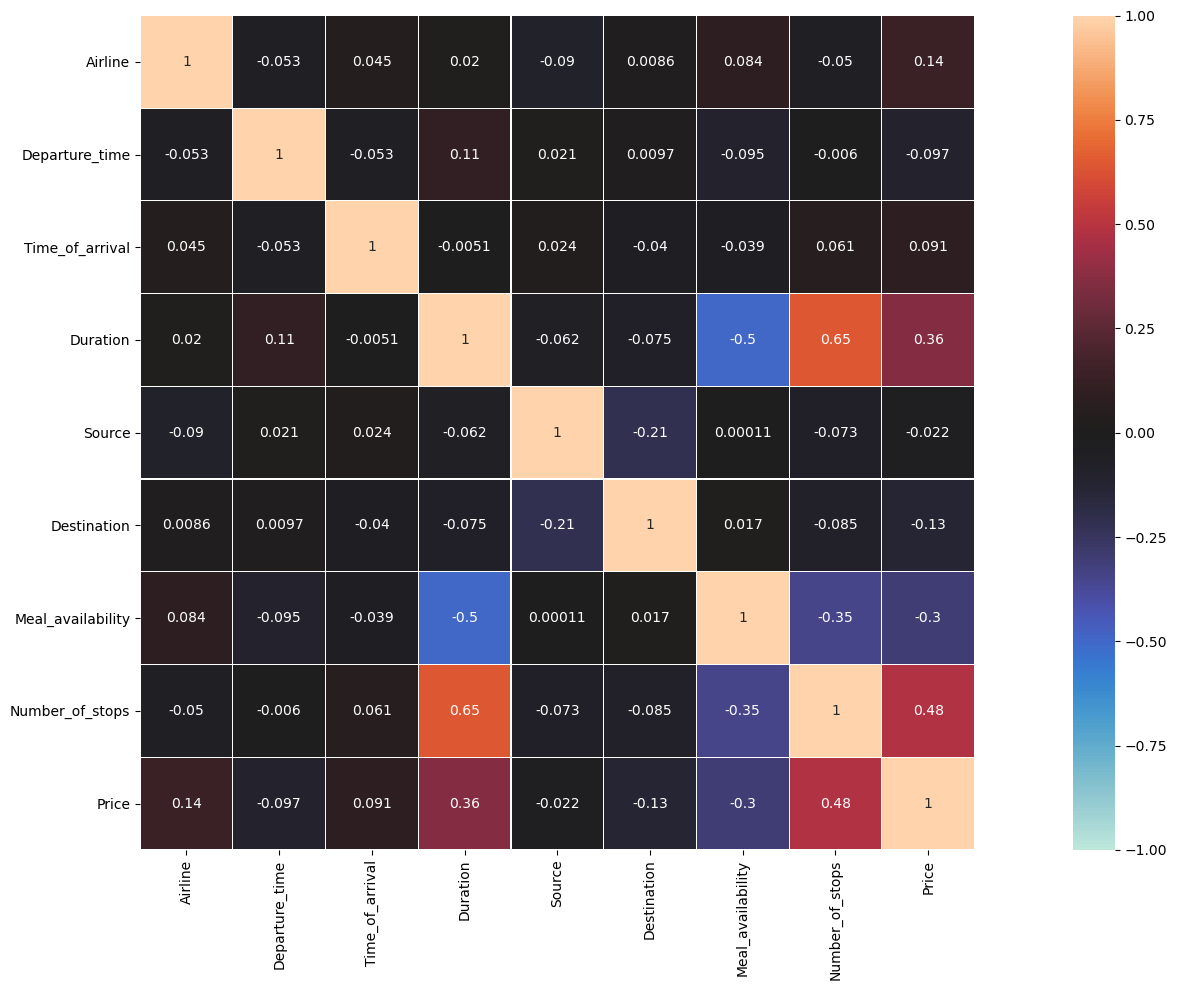

In [41]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* This heat map is showing the correlation among different features.
* Looking at this plot we can conclude that the features like Duration, Meal_availability and Number_of_stops are having more correlation with our target column.
* Rest of the features are having very less correlation with the target column.

In [42]:
#lets check the skewness
df.skew()

Airline             -0.064540
Departure_time       0.055366
Time_of_arrival     -0.550466
Duration             0.723785
Source              -0.072810
Destination         -0.090067
Meal_availability   -0.190135
Number_of_stops      0.409187
Price                0.928074
dtype: float64

In [43]:
#shuffling our data for getting good result while evaluating
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [44]:
df

Airline  Departure_time  Time_of_arrival   Duration  Source  \
0         3.0        6.583333        11.916667   5.333333     1.0   
1         5.0       14.250000        20.750000   6.500000     8.0   
2         1.0       17.333333         5.250000  11.916667     8.0   
3         5.0       12.500000         8.833333  20.333333     1.0   
4         1.0       14.000000        23.583333  33.583333     4.0   
...       ...             ...              ...        ...     ...   
5744      1.0       10.666667        10.916667  24.250000     8.0   
5745      5.0       15.416667         9.666667  18.250000     6.0   
5746      3.0        8.000000        13.333333   5.333333     1.0   
5747      2.0       11.500000        15.166667   3.666667     7.0   
5748      3.0        6.916667        12.500000   5.583333     2.0   

      Destination  Meal_availability  Number_of_stops    Price  
0             8.0                2.0                1  17065.0  
1             7.0                1.0                1  12255.0  
2             5.0                0.0                1  12570.0  
3             0.0                1.0                1   9284.0  
4             1.0                0.0                3  16675.0  
...           ...                ...              ...      ...  
5744          1.0                0.0                1  12360.0  
5745          3.0                0.0                1   8966.0  
5746          6.0                2.0                1  13390.0  
5747          0.0                2.0                1  15710.0  
5748          1.0                2.0                1  10829.0  

[5749 rows x 9 columns]

#### Seperate features and label as x and y respectively

In [45]:
x = df.drop(columns = 'Price')
y = df['Price']

In [46]:
#lets check skewness
x.skew()

Airline             -0.064540
Departure_time       0.055366
Time_of_arrival     -0.550466
Duration             0.723785
Source              -0.072810
Destination         -0.090067
Meal_availability   -0.190135
Number_of_stops      0.409187
dtype: float64

In [47]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

#### Applying StandardScaler to numerical features

In [48]:
#lets apply standard scaler to numerical features to bring them to common scale
numeric = ['Departure_time','Time_of_arrival','Duration']
categorical = ['Airline','Source','Destination','Meal_availability','Number_of_stops']
scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(x[numeric]), columns=numeric)
X_std = pd.merge(X_numeric_std, x[categorical], left_index=True, right_index=True)

In [49]:
X_std

Departure_time  Time_of_arrival  Duration  Airline  Source  Destination  \
0          -1.300039        -0.622428 -0.795798      3.0     1.0          8.0   
1           0.144874         0.856963 -0.548212      5.0     8.0          7.0   
2           0.725981        -1.738951  0.247830      1.0     8.0          5.0   
3          -0.184943        -1.138820  0.982570      5.0     1.0          0.0   
4           0.097758         1.331485  1.689998      1.0     4.0          1.0   
...              ...              ...       ...      ...     ...          ...   
5744       -0.530466        -0.789907  1.229394      1.0     8.0          1.0   
5745        0.364752        -0.999255  0.832094      5.0     6.0          3.0   
5746       -1.033044        -0.385168 -0.795798      3.0     1.0          6.0   
5747       -0.373410        -0.078124 -1.242983      2.0     7.0          0.0   
5748       -1.237217        -0.524733 -0.739107      3.0     2.0          1.0   

      Meal_availability  Number_of_stops  
0                   2.0                1  
1                   1.0                1  
2                   0.0                1  
3                   1.0                1  
4                   0.0                3  
...                 ...              ...  
5744                0.0                1  
5745                0.0                1  
5746                2.0                1  
5747                2.0                1  
5748                2.0                1  

[5749 rows x 8 columns]

#### Applying log transformation to our target variable


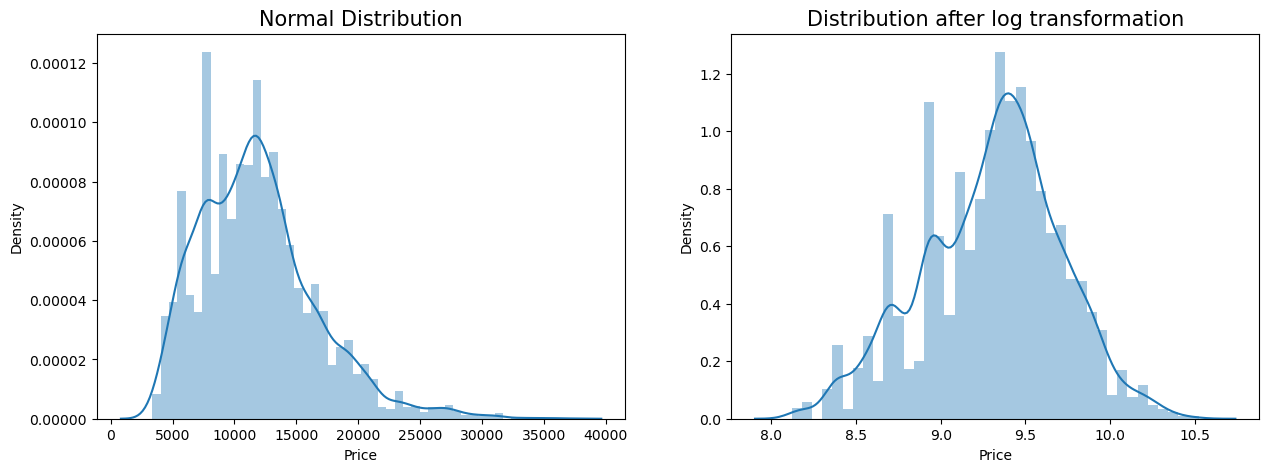

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Distribution after log transformation",fontsize=15)
sns.distplot(np.log(y))
plt.show()

As we can see our target variable is right skewed thats why I will apply log transfomation to it for better results.

#### Finding Best random_state

In [51]:
#To find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(X_std, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.37675136179866964 on Random State 1


#### Model Building With Evaluation


In [52]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y),test_size = 0.25, random_state =2)

In [53]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
ext = ExtraTreesRegressor()
lgb = LGBMRegressor()
lasso = LassoCV(max_iter=1000, normalize = True)
ridge = RidgeCV(cv=10,alphas=[0.1,1], normalize=True)

In [54]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print(f"Training r2 score:", r2_score(y_train,y_pred)*100,"%")
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X_std, np.log(y), cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

******************************LinearRegression******************************
MAE : 0.2528846914948316
RMSE : 0.325207433262602
------------------------------
Training r2 score: 37.347377134652405 %
Testing r2 Score: 33.14540818022213 %
------------------------------

Cross validation score : 36.07644139820354

Accuracy Score - Cross Validation Score : -2.9310332179814154


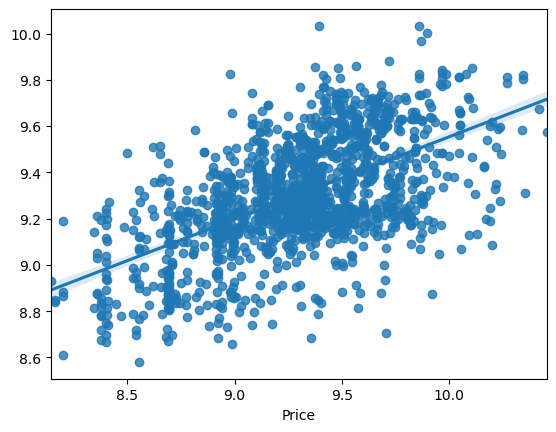

******************************LassoCV******************************
MAE : 0.25285830516418345
RMSE : 0.3251866749131965
------------------------------
Training r2 score: 37.34720670124514 %
Testing r2 Score: 33.1539427125993 %
------------------------------

Cross validation score : 36.076621511810394

Accuracy Score - Cross Validation Score : -2.9226787992110914


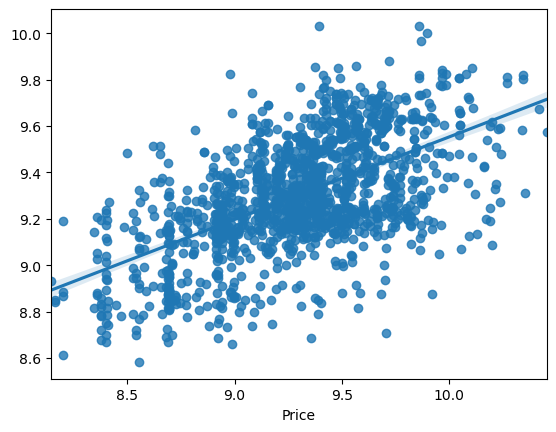

******************************RidgeCV******************************
MAE : 0.25257878471628836
RMSE : 0.3246530882269271
------------------------------
Training r2 score: 37.202631614975004 %
Testing r2 Score: 33.373133138688424 %
------------------------------

Cross validation score : 35.97105073733326

Accuracy Score - Cross Validation Score : -2.597917598644834


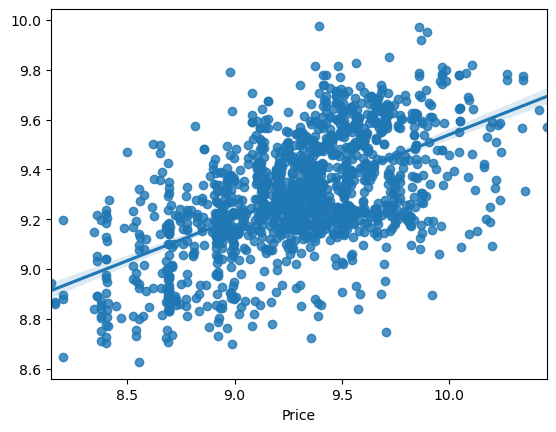

******************************DecisionTreeRegressor******************************
MAE : 0.19383520218890762
RMSE : 0.31756338031761727
------------------------------
Training r2 score: 99.97666451257274 %
Testing r2 Score: 36.2513273489211 %
------------------------------

Cross validation score : 45.878076651256336

Accuracy Score - Cross Validation Score : -9.626749302335234


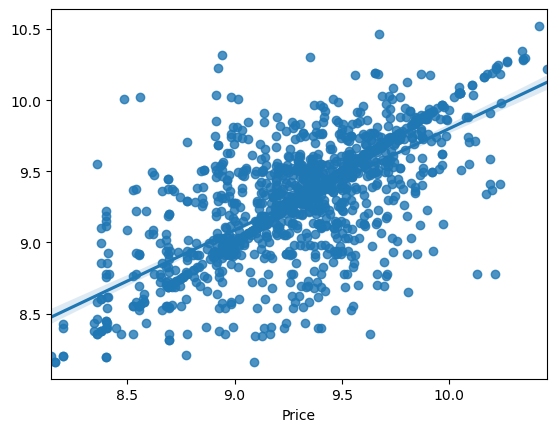

******************************RandomForestRegressor******************************
MAE : 0.15920566427192245
RMSE : 0.2327167484628243
------------------------------
Training r2 score: 95.53471126623653 %
Testing r2 Score: 65.76537344770921 %
------------------------------

Cross validation score : 70.12086523003929

Accuracy Score - Cross Validation Score : -4.355491782330077


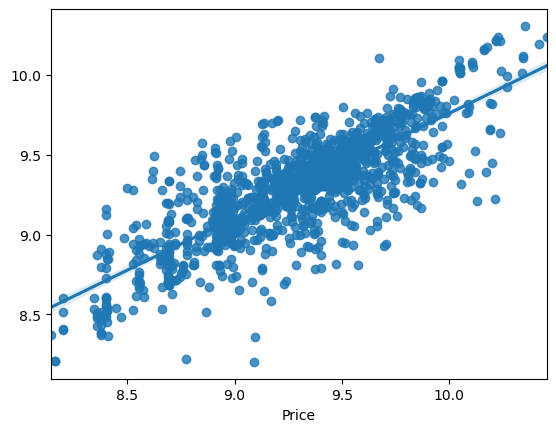

******************************XGBRegressor******************************
MAE : 0.15510885235361263
RMSE : 0.21979440107440018
------------------------------
Training r2 score: 93.73959285702966 %
Testing r2 Score: 69.46179088615875 %
------------------------------

Cross validation score : 73.36813214127929

Accuracy Score - Cross Validation Score : -3.9063412551205374


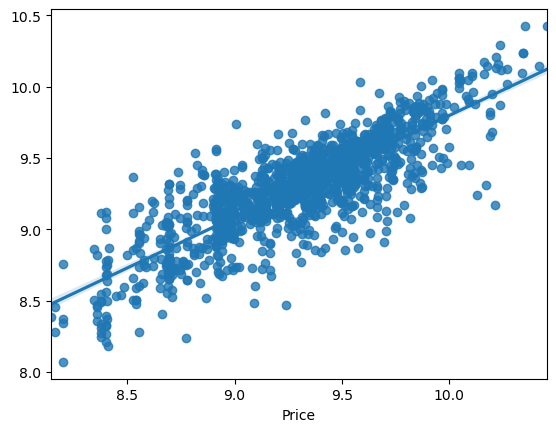

******************************ExtraTreesRegressor******************************
MAE : 0.14844982272939258
RMSE : 0.22753018217925053
------------------------------
Training r2 score: 99.97666450744957 %
Testing r2 Score: 67.27434533075312 %
------------------------------

Cross validation score : 71.91845686518225

Accuracy Score - Cross Validation Score : -4.644111534429129


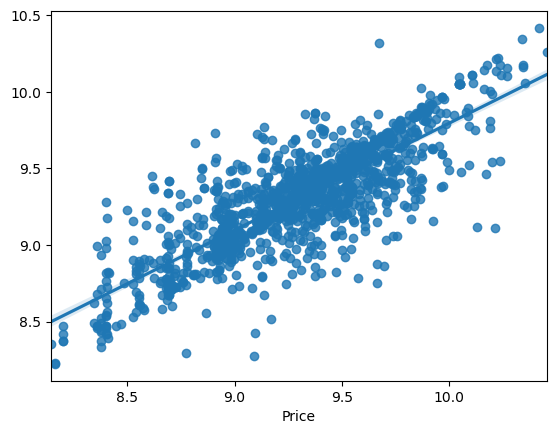

******************************LGBMRegressor******************************
MAE : 0.16712713624365194
RMSE : 0.2303806509694252
------------------------------
Training r2 score: 81.19550319723093 %
Testing r2 Score: 66.44924355359825 %
------------------------------

Cross validation score : 69.49316441484604

Accuracy Score - Cross Validation Score : -3.043920861247784


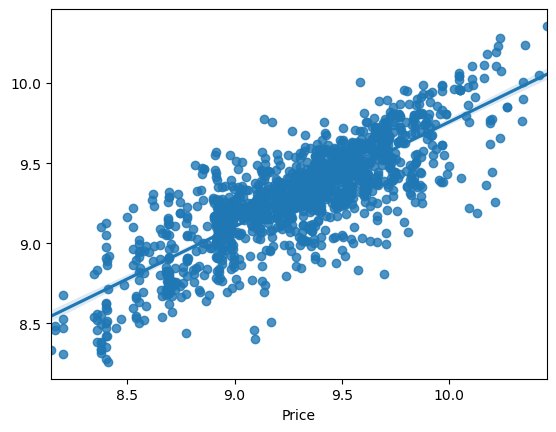

In [55]:
for model in [lr,lasso,ridge,dt,rf,xgb,ext,lgb]:
    BuiltModel(model)

In this project due to less features and simplisity our model may lead to over-fitting. We can observe Linear models showing very less accuracy, I will prefer to chose tree related algorithms among which LGBMRegressor is giving me less difference in r2-score and cv-score so i will select LGBMRegressor as a best suitable algorithm for our final model.

#### Hyperparameter Tuning

In [56]:
#lets selects different parameters for tuning
grid_params = {
                'boosting_type': ['str','gbdt'],
                'max_depth ':[-1,-0.5],
                'learning_rate': [0.1,0.2,0.3],
                'n_estimators':[800,900,1000]
                }

In [57]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(LGBMRegressor(), grid_params,verbose=1,refit=True,n_jobs=-1, cv = 5)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: -1


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['str', 'gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth ': [-1, -0.5],
                         'n_estimators': [800, 900, 1000]},
             verbose=1)

In [58]:
 #printing the best parameters found by GridSearchCV
GCV.best_params_      

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth ': -1,
 'n_estimators': 900}

# Final Model

In [59]:
#lets train and test our final model with best parameters
model = LGBMRegressor(boosting_type = 'gbdt', learning_rate = 0.1, n_estimators = 800, max_depth=-1)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.15005110765730872
RMSE : 0.21515509172084013
------------------------------
 
r2 Score: 70.73735553768903 %


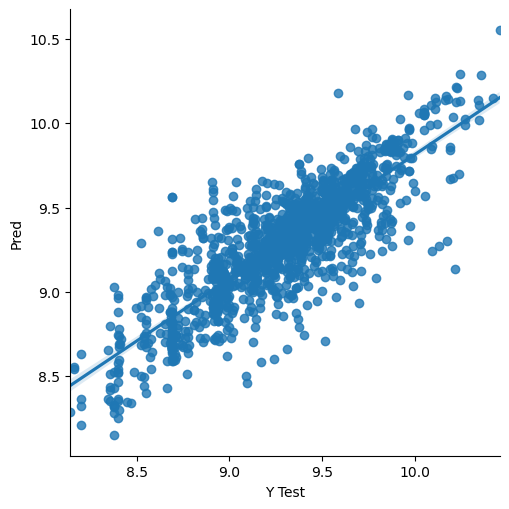

In [60]:
#Lets see the graph for actual vs predicted values
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

In [61]:
predicted_prices = np.exp(pred)
predicted_prices

array([ 8113.93690143, 12871.21185291,  4921.42906444, ...,
        8446.87735914, 10652.19828268, 11304.12934601])

### Saving The Model

In [62]:
import joblib
joblib.dump(model,"FlightPrice_prediction.pkl")

['FlightPrice_prediction.pkl']